In [ ]:
# Goal: Create a model that can accept image as input and classify image as cat and dog

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [3]:
# Extract the Zip File ---- Step required in colab if zip file uploaded

!unzip cats_and_dogs.zip


Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/train/
   creating: cats_and_dogs/train/cats/
  inflating: cats_and_dogs/train/cats/cat.0.jpg  
  inflating: cats_and_dogs/train/cats/cat.1.jpg  
  inflating: cats_and_dogs/train/cats/cat.10.jpg  
  inflating: cats_and_dogs/train/cats/cat.100.jpg  
  inflating: cats_and_dogs/train/cats/cat.101.jpg  
  inflating: cats_and_dogs/train/cats/cat.102.jpg  
  inflating: cats_and_dogs/train/cats/cat.103.jpg  
  inflating: cats_and_dogs/train/cats/cat.104.jpg  
  inflating: cats_and_dogs/train/cats/cat.105.jpg  
  inflating: cats_and_dogs/train/cats/cat.106.jpg  
  inflating: cats_and_dogs/train/cats/cat.107.jpg  
  inflating: cats_and_dogs/train/cats/cat.108.jpg  
  inflating: cats_and_dogs/train/cats/cat.109.jpg  
  inflating: cats_and_dogs/train/cats/cat.11.jpg  
  inflating: cats_and_dogs/train/cats/cat.110.jpg  
  inflating: cats_and_dogs/train/cats/cat.111.jpg  
  inflating: cats_and_dogs/train/cats/cat.112

In [ ]:
# #===============Incase of one directory and need to split =============================
# my_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
#                                                                validation_split=0.2)

# trainImageData = my_generator.flow_from_directory('cats_and_dogs/train',
#                                                      batch_size=20, #How many images to pass per tick
#                                                      class_mode='binary', #binary --- Binary Classification | categorical ---- Multi-class classification
#                                                      target_size=(64,64),
#                                                      subset='training')

# testImageData = my_generator.flow_from_directory('cats_and_dogs/train',
#                                                      batch_size=20, #How many images to pass per tick
#                                                      class_mode='binary', #binary --- Binary Classification | categorical ---- Multi-class classification
#                                                      target_size=(64,64),
#                                                      subset='validation')

In [4]:
# Preprocessing --- Goal is to make the data compatible for CNN
# Tensorflow by default offers direct class to achieve preprocessing

# ImageGenerators

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0) #Rescale is responsible to normalize each image
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [13]:
# Pass my images

#Epoch 2/2
#99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.4000 - loss: 0.7115 - val_accuracy: 0.5500 - val_loss: 0.6800

trainImageData = train_generator.flow_from_directory('cats_and_dogs/train',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='binary', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64)) #256X256

testImageData = test_generator.flow_from_directory('cats_and_dogs/validation',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='binary', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
trainImageData.image_shape

(64, 64, 3)

In [15]:
# Architect the NN

model = tf.keras.Sequential()

# Two Convolutional Layer

#First Convolutional Layer
# Conv2D(noFeatureMaps, kernelShape, inputShape, activation)

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=trainImageData.image_shape , padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Second Convolutional Layer
# Conv2D(noFeatureMaps, kernelShape, inputShape, activation)

model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu",padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Dropout Layer

model.add(tf.keras.layers.Dropout(0.2))

#Flatten

model.add(tf.keras.layers.Flatten())

#FC(Fully Connected Layer) layer | ANN Layer

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#if class mode --- categorical
#model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

#if class mode ---- binary
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))




In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,267,537 (8.65 MB)

 Trainable params: 2,267,537 (8.65 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Compile
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [18]:
type(trainImageData)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [19]:
class MyCLRuleMonitor(tf.keras.callbacks.Callback):
  def __init__(self, CL):
    super(MyCLRuleMonitor).__init__()
    self.CL = CL

  def on_epoch_end(self, epoch, logs=None):
    trainScore = logs["accuracy"]
    testScore = logs["val_accuracy"]

    if testScore > trainScore and testScore >= self.CL:
      self.model.stop_training = True

In [20]:
#Fit

#steps_per_epoch --- applicable for training data --- no_training_images/batchSize
#validation_steps --- applicable for testing data --- no_testing_images/batchSize

model.fit(trainImageData,
          validation_data=testImageData,
          epochs=200,
          steps_per_epoch=(len(trainImageData.filenames) // trainImageData.batch_size ),
          validation_steps=(len(testImageData.filenames) // testImageData.batch_size  ),
          callbacks=[MyCLRuleMonitor(0.7)])

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5402 - loss: 0.6951 - val_accuracy: 0.5780 - val_loss: 0.6753
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.6077 - loss: 0.6470 - val_accuracy: 0.6780 - val_loss: 0.6083
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7160 - loss: 0.5648 - val_accuracy: 0.6750 - val_loss: 0.6081
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7826 - loss: 0.4712 - val_accuracy: 0.6380 - val_loss: 0.6770
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.8124 - loss: 0.3935 - val_accuracy: 0.6630 - val_loss: 0.7236
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8828 - loss: 0.2751 - val_accuracy: 0.6450 - val_loss: 0.8963
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9208 - loss: 0.2084 - val_accuracy: 0.6300 - val_loss: 1.3060
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9567 - loss: 0.1150 - 

In [21]:
#Deploy Example

model

<Sequential name=sequential_1, built=True>

In [22]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs/train/cats/cat.1.jpg', target_size=(64,64))

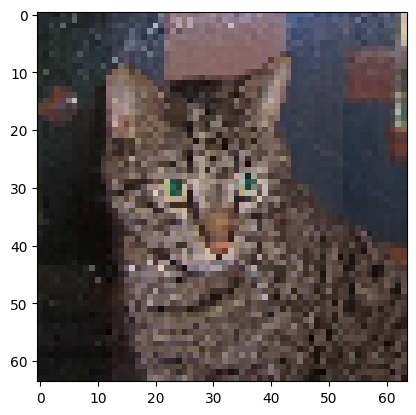

In [23]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [24]:
imgArray= tf.keras.preprocessing.image.img_to_array(img)
imgArray.shape

(64, 64, 3)

In [25]:
import numpy as np
compatibleArray = np.expand_dims(imgArray, axis=0)
compatibleArray.shape

(1, 64, 64, 3)

In [26]:
model.predict(compatibleArray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


array([[0.]], dtype=float32)

In [27]:
trainImageData.class_indices.items()

dict_items([('cats', 0), ('dogs', 1)])

In [28]:
{v:k for k,v in trainImageData.class_indices.items()} [ np.argmax(model.predict(compatibleArray)) ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'cats'

In [29]:
{v:k for k,v in trainImageData.class_indices.items()}

{0: 'cats', 1: 'dogs'}